# Pymaceuticals Inc.
---

### Analysis Note

- A note, the data set started off with 249 mouse subjects but one was dropped due to duplicate timepoints. The final 248 subjects were used for further analysis.

### Overview and Observations

- Using the 248 subjects, mean, median, variance, standard deivation, and standard error for the tumor volumes for each drug were evaluated. 
- A bar graph was generated for number of timepoints collected for each mouse and drug regimen. 
    - Most drugs have similar numbers of timepoints overall. With the exceptions of Capomulin and Ramicane which have a higher number of timepoints taken and Propriva which has a lower number of timepoints taken. 
- Due to some mice having more timepoints than others it skews the value counts of male vs female. After taking out additional timepoints a pie chart can be made to compare. 
    - The data set is even across the two sexes.
- A comparison using boxplots was created for four of the drug regimens (Capomulin, Ramicane, Infubinol, and Ceftamin).
    - Infubinol had one potential outlier with one mouse tumor which was much lower in size than the others in the dataset. Capomulin and Ramicane both had lower tumor sizes than the other two drugs with some of their max tumor sizes being the minimum tumor sizes for Infubinol and Ceftamin. 
    - It seems, of the four drug regimens, that Capomulin and Ramicane have the best performance of reducing tumor size. 
- Looking further into the Capomulin regimen the line chart gives some insight into the obstruction of tumor growth.
    - Tumor growth is rapid for the first 20 days, then it sharply declines until about day 25 where it begins to grow again. After a shorter growth period on day 30 the tumor declines in size for another 5 days. At days 40-45 the tumor begins another growth period at which point the data set ends.
    - It would be interesting to see additional timepoints later on to determine if tumor size becomes stable, declines again after another 5 day growth period, or grows back to the initial size or greater.
    - Also, the data shown is for one mouse subject. It would be beneficial to compare similar line charts for additional mouse subjects to see if the others perform the same way. 
- For the Capomulin regimen, a scatter plot was charted to determine correlation between mouse weight and average tumor size. 
    - Since linear regression predicts the relationship between the two variables and correlation coefficent (r) shows correlation these suggest a strong positive correlation between mouse weight and tumor size. Therefore, as the mouse is larger so too is the tumor size.

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Starter_Code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Starter_Code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata,study_results,on="Mouse ID",how='outer')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [33]:
# Checking the number of mice.
total_mice = len(combined_data["Mouse ID"].unique())
total_mice

249

In [34]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [35]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_data.loc[combined_data["Mouse ID"] == "g989"]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.loc[combined_data["Mouse ID"] != "g989"]
cleaned_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [37]:
# Checking the number of mice in the clean DataFrame.
total_mice = len(cleaned_data["Mouse ID"].unique())
total_mice

248

## Summary Statistics

In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_mean = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_variance = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_st_dev = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

tumor_stat_summary = pd.DataFrame({
    "Mean Tumor Volume": tumor_mean,
    "Median Tumor Volume": tumor_median,
    "Tumor Volume Variance": tumor_variance,
    "Tumor Volume Std. Dev.": tumor_st_dev,
    "Tumor Volume Std. Err.": tumor_sem
})

tumor_stat_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [39]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = cleaned_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

agg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [40]:
# Creating a series to group the data for the charts.
drug_counts = cleaned_data["Drug Regimen"].value_counts()

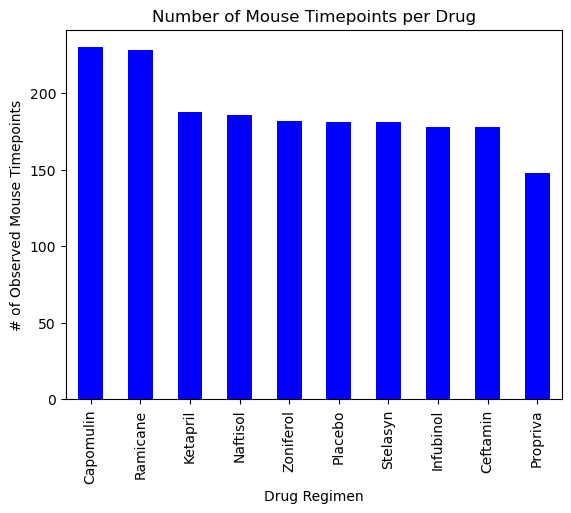

In [41]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
totalrows_bar = drug_counts.plot(kind="bar", title="Number of Mouse Timepoints per Drug", xlabel="Drug Regimen",
                                 ylabel="# of Observed Mouse Timepoints",facecolor="blue")
plt.show()

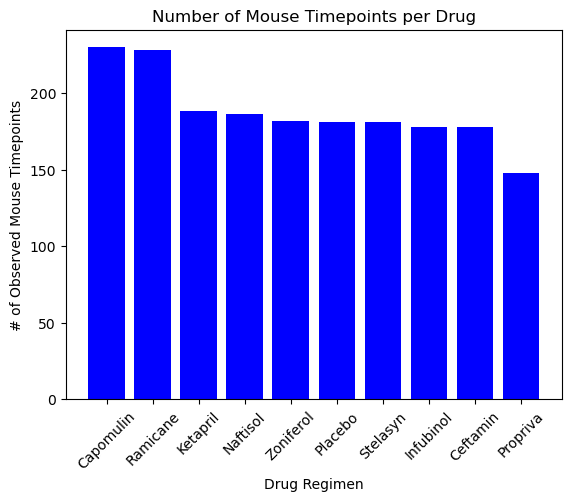

In [42]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_counts.index, drug_counts.values, color='b', alpha=1, align="center")
plt.xticks(rotation= 45)
plt.title("Number of Mouse Timepoints per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

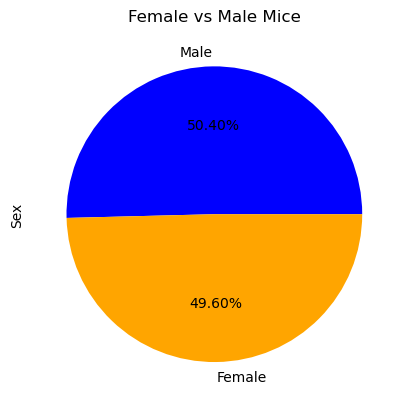

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# There are more timepoints for some mice than others, so this line drops those extra lines which skew the data.  
unique_MF_counts = cleaned_data.drop_duplicates(subset=["Mouse ID"])[["Mouse ID", "Sex"]]
# Counts and pie chart creation
MF_counts = unique_MF_counts["Sex"].value_counts()
MF_pie = MF_counts.plot(kind="pie",ylabel="Sex", title="Female vs Male Mice", autopct="%.2f%%", colors=["b","orange"])
plt.show()

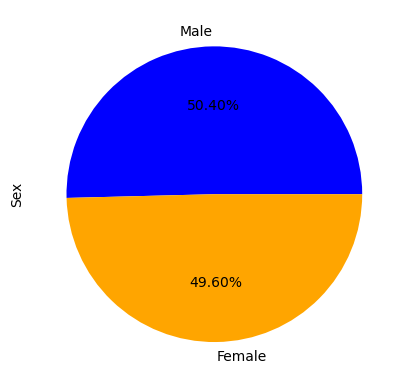

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = MF_counts.index
sizes = MF_counts.values
colors = ["blue","orange"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%.2f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_data.groupby(["Mouse ID"])["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
clean_max_data = pd.merge(cleaned_data, max_timepoint, on=("Mouse ID","Timepoint"))
clean_max_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [46]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    filtered_drug = clean_max_data.loc[clean_max_data["Drug Regimen"] == drug]["Tumor Volume (mm3)"]

    # add subset 
    tumor_vol.append(filtered_drug)
    
    # Determine outliers using upper and lower bounds
    quartiles = filtered_drug.quantile([.25,.5,.75])
    upperq = quartiles[0.75]
    lowerq = quartiles[0.25]
    iqr = upperq - lowerq
    
    upper_bound = upperq + (1.5*iqr)
    lower_bound = lowerq - (1.5*iqr)
    outliers = filtered_drug.loc[(filtered_drug < lower_bound) | (filtered_drug > upper_bound)]
    
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


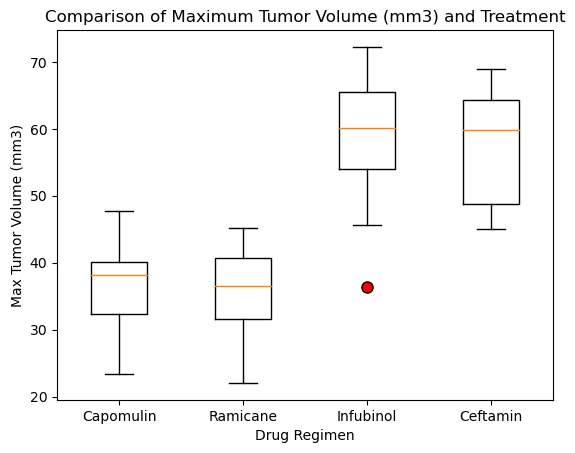

In [47]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol, labels=treatments, showfliers=True, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Max Tumor Volume (mm3)")
ax1.set_title("Comparison of Maximum Tumor Volume (mm3) and Treatment")
plt.show()

## Line and Scatter Plots

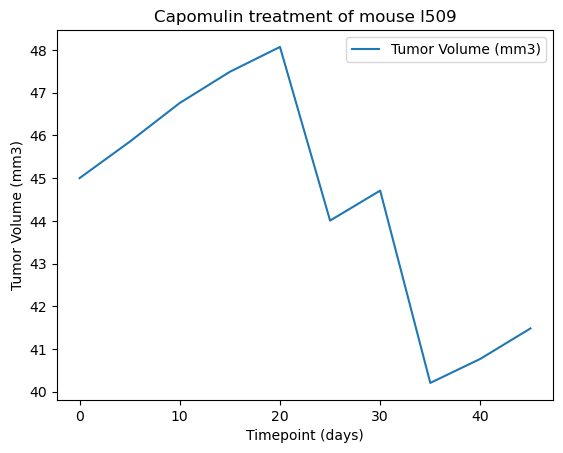

In [48]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509 = cleaned_data.loc[cleaned_data["Mouse ID"] == "l509"]
capomulin_line = l509.plot(kind="line",x="Timepoint",y="Tumor Volume (mm3)", title="Capomulin treatment of mouse l509", 
                           ylabel="Tumor Volume (mm3)", xlabel="Timepoint (days)")
plt.show()

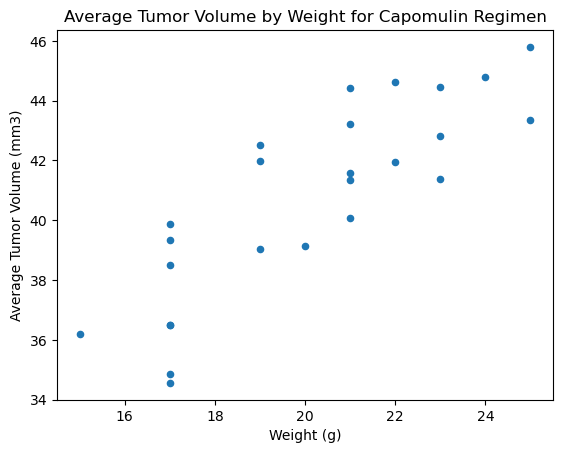

In [49]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"]
avg_capomulin = capomulin.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()
scatter_capomulin = avg_capomulin.plot(kind="scatter",x="Weight (g)", y="Tumor Volume (mm3)",
                                   title="Average Tumor Volume by Weight for Capomulin Regimen",
                                   xlabel="Weight (g)", ylabel="Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume on the Capomulin regimen is 0.84.


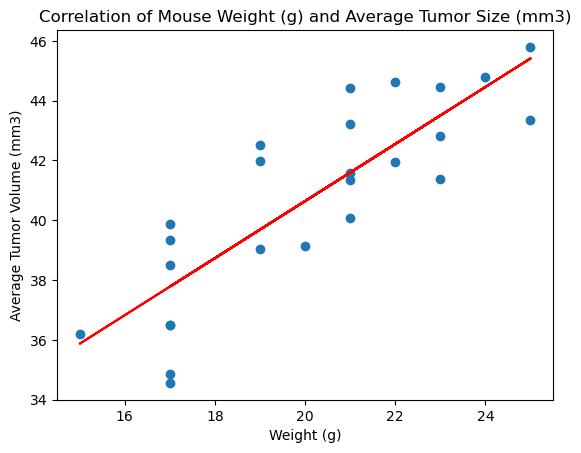

In [50]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x= avg_capomulin["Weight (g)"]
y= avg_capomulin["Tumor Volume (mm3)"]

correlation = st.pearsonr(x,y)

print(f"The correlation between weight and average tumor volume on the Capomulin regimen is {round(correlation[0],2)}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

plt.title("Correlation of Mouse Weight (g) and Average Tumor Size (mm3)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()